# Cursland

## Ejercicio de Derivadas #31

[Canal de Youtube](https://www.youtube.com/@Cursland)

[Lista de Reproducción de Derivadas](https://youtube.com/playlist?list=PLa4T14UYWeoUW2eNMSSkLiq5c6ivgAxuq&feature=shared)

### La función es:

<IPython.core.display.Math object>

La función en latex es: \frac{e^{x}}{x^{\frac{4}{3}} + 2}


### La derivada es:

<IPython.core.display.Math object>

La derivada en latex es: - \frac{4 \sqrt[3]{x} e^{x}}{3 \left(x^{\frac{4}{3}} + 2\right)^{2}} + \frac{e^{x}}{x^{\frac{4}{3}} + 2}


### La respuesta es: CORRECTA

<IPython.core.display.Math object>

La respuesta en latex es: \frac{\left(x^{\frac{4}{3}} - \frac{4 \sqrt[3]{x}}{3} + 2\right) e^{x}}{\left(x^{\frac{4}{3}} + 2\right)^{2}}


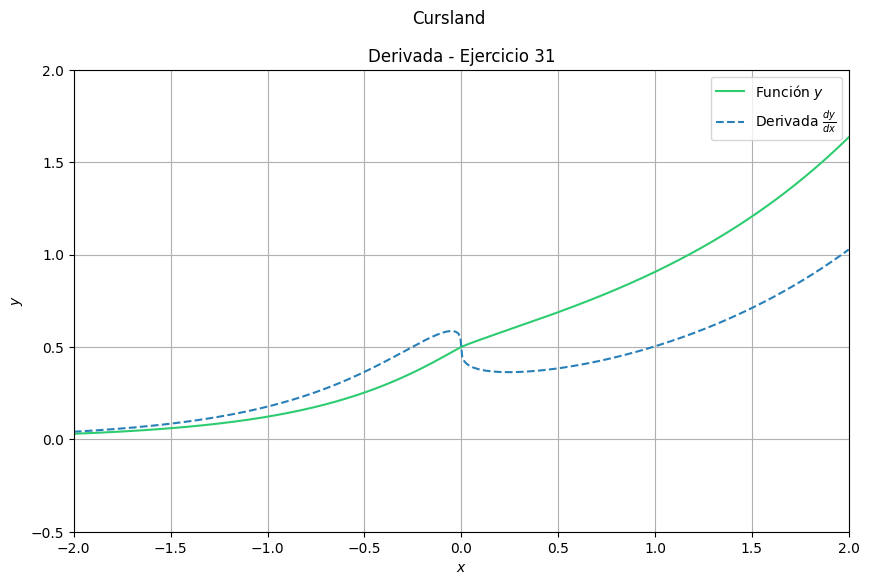

In [6]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Markdown


x = sp.symbols('x')

#
# ÁLGEBRA
#

y = sp.exp(x) / (x**sp.Rational(4, 3) + 2)
dy_dx = sp.diff(y, x)
respuesta = (sp.exp(x) * (x**sp.Rational(4, 3) + 2 - sp.Rational(4, 3) * x**sp.Rational(1, 3))) / (x**sp.Rational(4, 3) + 2)**2

# Comprobamos si la derivada propuesta es correcta
es_correcta = sp.simplify(dy_dx - respuesta) == 0

# Mostramos la función y la derivada
display(Markdown("### La función es:"))
display(Math(sp.latex(y)))
print(f"La función en latex es: {sp.latex(y)}")

display(Markdown("### La derivada es:"))
display(Math(sp.latex(dy_dx)))
print(f"La derivada en latex es: {sp.latex(dy_dx)}")

mensaje = 'CORRECTA' if es_correcta else 'INCORRECTA'
display(Markdown(f"### La respuesta es: {mensaje}"))
display(Math(sp.latex(respuesta)))
print(f"La respuesta en latex es: {sp.latex(respuesta)}")


#
# GRÁFICA
#

def graficar(f, intervalos, grafica, etiqueta, estilo, color):
    grafica.xlabel('$x$')
    grafica.ylabel('$y$')
    grafica.grid(True)

    for intervalo in intervalos:
        inicio = intervalo[0]
        fin = intervalo[1]
        
        x_vals = np.linspace(inicio, fin, 400)
            
        y_vals = [f(x_val) for x_val in x_vals]
        
        #Si es el primero, agregamos la etiqueta
        if intervalo == intervalos[0]:
            grafica.plot(x_vals, y_vals, label=etiqueta, linestyle=estilo, color=color) 
        else:
            grafica.plot(x_vals, y_vals, linestyle=estilo, color=color)

def potencia_fraccionaria(x, n, m):
    signo = np.sign(x)
    x = abs(x)
    x = x ** (1/m)
    x = x * signo
    return x ** n

def funcion(x) -> float:
    numerador = np.exp(x)
    denominador = potencia_fraccionaria(x, 4, 3) + 2
    
    return numerador / denominador

def derivada(x) -> float:
    numerador = np.exp(x) * (potencia_fraccionaria(x, 4, 3) + 2) - np.exp(x) * (4/3) * potencia_fraccionaria(x, 1, 3)
    denominador = (potencia_fraccionaria(x, 4, 3) + 2)**2
    return numerador / denominador

plt.figure(figsize=(10, 6))
plt.title("Derivada - Ejercicio 31")
plt.suptitle("Cursland")
plt.margins(0)

# Graficamos la función
graficar(funcion, [(-2, 2)], plt, "Función $y$", "solid", "#2ecc71")
graficar(derivada, [(-2, 2)], plt, "Derivada $\\frac{dy}{dx}$", "--", "#2980b9")

# Personalización de la gráfica
plt.ylim(-0.5, 2)
plt.legend()

# Guardar la gráfica
plt.savefig("Ejercicio_31.svg", format='svg')
plt.savefig("Ejercicio_31.png", format='png', dpi=300)

plt.show()
